<div style="display: flex; justify-content: flex-end; align-items: center;">
    <div style="width: 30%; text-align: right; margin-right: 20px;">
        <img src="https://www.juntadeandalucia.es/datosabiertos/portal/uploads/group/2024-06-03-104849.710850fps-da.png" alt="Web Fundación Progreso y Salud" style="width: 100%;"/>
    </div>
    <div style="width: 60%; margin-right: 1em;">
        <p style="text-align: right; font-weight: bold; font-size: 2em; margin-top: 30px;">
            Table1 and models
        </p>
        <p style="text-align: right; color: #666">
            Proyect: EII
        </p>
        <p style="text-align: right; color: #666">
            Ahmed Bouallou | Juan Luis González Rodríguez
        </p>
    </div>
</div>

Perform a subgroup analysis of the aforementioned objectives based on the drug used and maintenance dosage, associated immunosuppressants and the characteristics of age at diagnosis and drug levels.

Important to note: in this initial phase, we are only use two biological drugs in our dataset: USTEKINUMAB & VEDOLIZUMAB


## 1.Libraries

In [22]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import shap
from summarytools import dfSummary
from sklearn.model_selection import train_test_split,  RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from tableone import TableOne
from fairlearn.metrics import MetricFrame
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from scipy.stats import shapiro
from xgboost import XGBClassifier
import xgboost as xgb
import os


The next step will be to load our dataset into the notebook:

In [23]:
# Replace 'C:\..."" with the path to your actual CSV file
df = pd.read_csv("./data/clean_df.csv")

## 2.Exploratory Data Analysis

Analyzing the data:

In [24]:
# How many rows and columns are there in the dataset
df.shape

(228, 81)

In [25]:
# Visualize the top 5 rows of the dataframe excluding the ID column
df[df.columns[1:]].head()

,fecha_inicio_far,fecha_diag,ppio_activo,sexo,familia_eii,loc_ec,comp_ec,exten_cu,tipo_eii,preianal,...,lab_neutrofilos_recuento,lab_leucocitos_recuento,lab_dispersion_hematies_volumen,lab_hemoglobina_corpuscular_media,lab_volumen_corpuscular_medio,lab_hematocrito,lab_hematies_recuento,lab_bilirrubina_total,lab_fosfatasa_alcalina,lab_alfa_1_glicoproteina_acida
0,2020-09-30,2007-01-01,USTEKINUMAB,H,0.0,2,1,0,EC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-05-27,2000-01-01,VEDOLIZUMAB,M,0.0,0,0,3,CU,0,...,6.01,8.9,14.6,29.9,94.6,0.3,3.35,0.57,68.0,NaN
2,2020-12-02,2008-12-02,USTEKINUMAB,H,0.0,1,3,0,EC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-20,2009-10-01,VEDOLIZUMAB,H,2.0,2,2,0,EC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-26,2009-10-01,USTEKINUMAB,H,2.0,2,2,0,EC,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Visualize the last 5 rows of the dataframe
df[df.columns[1:]].tail()

,fecha_inicio_far,fecha_diag,ppio_activo,sexo,familia_eii,loc_ec,comp_ec,exten_cu,tipo_eii,preianal,...,lab_neutrofilos_recuento,lab_leucocitos_recuento,lab_dispersion_hematies_volumen,lab_hemoglobina_corpuscular_media,lab_volumen_corpuscular_medio,lab_hematocrito,lab_hematies_recuento,lab_bilirrubina_total,lab_fosfatasa_alcalina,lab_alfa_1_glicoproteina_acida
223,2021-09-24,2015-05-20,USTEKINUMAB,H,0.0,0,0,2,CU,0,...,5.91,9.19,14.9,25.7,94.1,38.0,4.04,0.28,100.0,166.3
224,2021-09-22,2008-05-02,USTEKINUMAB,H,0.0,0,0,3,CU,0,...,9.00,11.78,17.2,24.8,75.5,39.8,5.27,0.38,89.0,313.8
225,2021-03-02,1992-01-01,USTEKINUMAB,H,0.0,3,3,0,EC,1,...,6.65,11.77,14.4,28.2,87.4,45.0,5.15,0.32,61.0,97.5
226,2021-08-23,2017-09-26,USTEKINUMAB,H,0.0,1,1,0,EC,1,...,3.23,7.40,12.3,32.3,92.3,44.3,4.80,0.71,80.0,98.0
227,2021-07-29,2012-10-01,USTEKINUMAB,H,0.0,2,1,0,EC,1,...,5.41,7.32,13.3,34.1,100.5,40.5,4.03,0.39,110.0,NaN


In [27]:
# Name of the columns
df.columns

Index(['ID', 'fecha_inicio_far', 'fecha_diag', 'ppio_activo', 'sexo',
       'familia_eii', 'loc_ec', 'comp_ec', 'exten_cu', 'tipo_eii', 'preianal',
       'ada_previo', 'ifx_previo', 'uste_previo', 'vedo_previo', 'tofa_previo',
       'certol_previo', 'golim_previo', 'cx_previa_eii', 'tabaco',
       'meis_espondiloartropatías', 'meis_uveitis', 'meis_eritema_nodoso',
       'meis_pioderma_gangrenoso', 'meis_colangitis_esclerosanteprimaria',
       'meis_estomatitis_aftosa', 'meis_SdSweet', 'meis_psoriasis',
       'meis_hidrosiadenitis', 'meis_vasculitis', 'meis_vitiligo',
       'meis_osteoporosis', 'meis_fenom_tromboembolico', 'res_clin_26',
       'res_clin_52', 'rem_clin_52', 'res_clin_104', 'rem_clin_104',
       'edad_inicio_far', 'edad_diag', 'cort_12m_previo', 'diabetes', 'asma',
       'vih', 'migrana', 'calprotectina', 'lab_velocidad_sed_globular',
       'lab_sodio', 'lab_aspartato_transaminasa', 'lab_glucosa',
       'lab_proteinas_totales', 'lab_urea', 'lab_potasio',
    

In [28]:
# Correct the column name
df.rename(columns={'preianal': 'perianal'}, inplace=True)
print(df.columns)

Index(['ID', 'fecha_inicio_far', 'fecha_diag', 'ppio_activo', 'sexo',
       'familia_eii', 'loc_ec', 'comp_ec', 'exten_cu', 'tipo_eii', 'perianal',
       'ada_previo', 'ifx_previo', 'uste_previo', 'vedo_previo', 'tofa_previo',
       'certol_previo', 'golim_previo', 'cx_previa_eii', 'tabaco',
       'meis_espondiloartropatías', 'meis_uveitis', 'meis_eritema_nodoso',
       'meis_pioderma_gangrenoso', 'meis_colangitis_esclerosanteprimaria',
       'meis_estomatitis_aftosa', 'meis_SdSweet', 'meis_psoriasis',
       'meis_hidrosiadenitis', 'meis_vasculitis', 'meis_vitiligo',
       'meis_osteoporosis', 'meis_fenom_tromboembolico', 'res_clin_26',
       'res_clin_52', 'rem_clin_52', 'res_clin_104', 'rem_clin_104',
       'edad_inicio_far', 'edad_diag', 'cort_12m_previo', 'diabetes', 'asma',
       'vih', 'migrana', 'calprotectina', 'lab_velocidad_sed_globular',
       'lab_sodio', 'lab_aspartato_transaminasa', 'lab_glucosa',
       'lab_proteinas_totales', 'lab_urea', 'lab_potasio',
    

In [29]:
# Number of missing values (NaNs) for each numerical variable
pd.set_option('display.max_rows', 100)

missing_values = df.isnull().sum()

# Sort the missing values in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print(missing_values)

lab_colesterol                       111
lab_trigliceridos                    106
lab_alfa_1_glicoproteina_acida       104
lab_fosfatasa_alcalina                95
lab_acido_folico                      94
lab_bilirrubina_total                 93
lab_ferritina                         91
lab_velocidad_sed_globular            91
lab_vitamina_b12                      88
lab_proteina_c_reactiva               86
calprotectina                         85
lab_urea                              84
lab_aspartato_transaminasa            82
lab_proteinas_totales                 82
lab_creatinina                        81
lab_alanina_transaminasa              81
lab_glucosa                           81
lab_potasio                           81
lab_sodio                             81
lab_leucocitos_recuento               80
lab_volumen_plaquetario_medio         80
lab_dispersion_hematies_volumen       80
lab_hematocrito                       79
lab_volumen_corpuscular_medio         79
lab_hemoglobina_

Let's check if there are more than 50% missing in a row or a column to drop it.

In [30]:
# Check columns in df with more than 50% of NA's 
missing_values = missing_values[missing_values > 0.5 * df.shape[0]]

print("There are", missing_values.shape[0], "columns with more than 50% of missing values")

There are 0 columns with more than 50% of missing values


In [31]:
# Check rows in df with more than 50% of NA's 
missing_values_rows = df.isnull().sum(axis=1)

missing_values_rows = missing_values_rows[missing_values_rows > 0.5 * df.shape[1]]

print("There are", missing_values_rows.shape[0], "rows with more than 50% of missing values")

There are 0 rows with more than 50% of missing values


In [32]:
#Let's check for nan in the target variables
target_vars = ['res_clin_26', 'res_clin_52', 'rem_clin_52', 'res_clin_104', 'rem_clin_104']

missing_values_target = df[target_vars].isnull().sum()

print(missing_values_target)

res_clin_26      0
res_clin_52      0
rem_clin_52      0
res_clin_104    38
rem_clin_104    38
dtype: int64


In [33]:
# Check data types and non-null values of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 81 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    228 non-null    object 
 1   fecha_inicio_far                      228 non-null    object 
 2   fecha_diag                            228 non-null    object 
 3   ppio_activo                           228 non-null    object 
 4   sexo                                  228 non-null    object 
 5   familia_eii                           223 non-null    float64
 6   loc_ec                                228 non-null    int64  
 7   comp_ec                               228 non-null    int64  
 8   exten_cu                              228 non-null    int64  
 9   tipo_eii                              228 non-null    object 
 10  perianal                              228 non-null    int64  
 11  ada_previo         

In [34]:
# Generate visual summary and statistics of the dataframe
dfSummary(df.drop(columns=['ID']))

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fecha_inicio_far[object],1. 2019-09-302. 2019-04-013. 2020-11-054. 2021-06-085. 2020-11-256. 2019-07-017. 2021-02-158. 2020-11-209. 2021-01-2110. 2021-02-1611. other,3 (1.3%)3 (1.3%)3 (1.3%)3 (1.3%)2 (0.9%)2 (0.9%)2 (0.9%)2 (0.9%)2 (0.9%)2 (0.9%)204 (89.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8WgzjOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADvklEQVR4nO3cQU4jVxhG0d+W1QmTsixLLIMF9CJYbBbhBbAPhKhB6DBxBk1PW0kD15FzzhypBlfPdul9bM7n80Bhe+kH4P9DbGTERkZsZMRGRmxkxEZGbGTERmYzMzcz82VmXs/n88uFn4crtjsej/fLshzWdX3abDZ/CI7Psl2W5XB3dzfLshzm+wkHn2I7M3Nzc/PXpR+E6+cHAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnOzLy8vPx26Qfh+m3XdX16eHiYdV2fZub10g/E9bJBILPxL7OoONnIWFeRsa4iY11FxktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyLgWTsbghYyTjYzBCxmDFzIGL2S81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNj8ELG4IWMa+FkDF7I+IFAxscoGesqMtZVZKyryPiBQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXwslYV5H5cbKNU43Ptjsej/czM8YufLbtsiwHYxcK3rORERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZHZvQ1dZoxd+GSuhZMxeCHjZCNj8ELG4IWMVx9kxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iowNAhnrKjJONjLWVWSsq8h49UFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYxr4WQMXsg42cgYvJAxeCHj1QcZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzKuhZMxeCHjOxsZH6NkrKvIWFeR8Z2NjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ18LJWFeRcbKRMXghY/BCxqsPMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kXAsnY/BC5sfJ5ko4/8Trez4Bd8fj8f5tgwA/ta7r03uGUbtlWQ5fv3592e/33z764bgez8/Pv59Op8Pj4+OXmfm12GZm9vv9t9vb2z8/9Om4Rjfv+WPv2ciIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjsZr5fH7n0g/Df9hGN7NZ1fTqdTod55/URrt/bOOqXh1GuhfNvvOtauMELGT8QyIiNjNjIiI2M2MiIjYzYyIiNjNjI/A3rdVMzgMGpZAAAAABJRU5ErkJggg=="">",0(0.0%)
2,fecha_diag[object],1. 1998-01-012. 2003-01-013. 2005-01-014. 2001-01-015. 1997-01-016. 2002-01-017. 1994-01-018. 2013-01-019. 1999-01-0110. 2010-01-0111. other,6 (2.6%)6 (2.6%)6 (2.6%)6 (2.6%)6 (2.6%)5 (2.2%)5 (2.2%)4 (1.8%)4 (1.8%)4 (1.8%)176 (77.2%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8WgzjOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADwUlEQVR4nO3cQWoaYQCG4d8iId0oEvAwHqKH7SHmNhJmFk3pxi6aFNNNocRXsc+zCRUCA30ZmeH/sjqdTgMKn659Afw/xEZGbGTERkZsZMRGRmxkxEZGbGRWY4zPY4yHs89+nE6nlytdD3ds/fT09GWz2ezePliW5Xm1Wn0VHB9tvdlsdofD4WW73X6f5/lxmqbd8Xh8GGOIjQ+1HmOM7Xb7fb/ff3v97PMVr4c75gGBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIrMcYY57nx/OfcAnrZVmep2najddzbMuyPI8xflz3srhHNghkVv5kFhV3NjLWVWSsq8hYV5HxUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh485GxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q8IJDxNUrGuoqMdRUZ6yoyHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i41g4GesqMu5sZAxeyBi8kDF4IeOlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2QcCydj8ELmzzubuxoX827wYuzCJX16G7wcDoeX1+ge/vpb8A9+D15e/23swsV4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTeravgks7XVZZVXJQNAhnrKjLubGSsq8hYV5GxriLjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxp2NjMELGYMXMgYvZLzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxj4WQMXsh4QCDja5SMdRUZ6yoy1lVkPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11FxrFwMtZVZNzZyBi8kDF4IWPwQsZLXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IXMn3c27s/NfFu9G7xwf25pxLR+G7yc7RC4E/M8P07TtDsejw9jjOvHNsavwct+v/927YvhIm5mxOSlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDlzt2a/+v54OXmzmKwse5pRGTY+H372aOhRu8kPGAQEZsZMRGRmxkxEZGbGTERkZsZMRG5ie3qBEHEDp2eQAAAABJRU5ErkJggg=="">",0(0.0%)
3,ppio_activo[object],1. USTEKINUMAB2. VEDOLIZUMAB,136 (59.6%)92 (40.4%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8WgzjOAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PA+5N1Twbe5CGz0ypwzAIUSEfeIuGUfYuQ953

Some missing values encoded as EA (empty answer) in the dataset has been identified. We will remove these columns.

In [35]:
# As the columns with 'EA' belong to variables that will not be considered,
# the variables res_clin_104 and rem_clin_104 will be eliminated

df.drop(columns=['res_clin_104', 'rem_clin_104'], inplace=True)

# Check the unique values of the columns res_clin_26, res_clin_52, rem_clin_52
n = df.shape[0]
print(df['res_clin_26'].value_counts())
print(df['res_clin_52'].value_counts())
print(df['rem_clin_52'].value_counts())

# Remove the rows with 'EA' in the target variables
df = df[df['res_clin_26'] != 'EA']
df = df[df['res_clin_52'] != 'EA']
df = df[df['rem_clin_52'] != 'EA']

# Print a report with the number of rows removed
print("Number of rows removed:", n - df.shape[0])


########### CODE TO ELIMINATE ROWS WITH 'EA' IN TARGET 104 VARIABLES ############
# Just in case you want to eliminate rows with 'EA' in target variables

# Print before the elimination res_clin_104 and rem_clin_104
#print("Before the elimination")
#print(df['res_clin_104'].value_counts())
#print(df['rem_clin_104'].value_counts())

# Eliminate the rows with invalid values ('EA') in all targets variables
#for target_var in target_vars:
#    df = df[df[target_var] != 'EA']

#print("-"*20)
# Check the unique values of the columns
#print("\nAfter the elimination")
#print(df['res_clin_104'].value_counts())
#print(df['rem_clin_104'].value_counts())


# Restar the index
df.reset_index(drop=True, inplace=True)

res_clin_26
1    179
0     49
Name: count, dtype: int64
res_clin_52
1     183
0      44
EA      1
Name: count, dtype: int64
rem_clin_52
1     124
0     103
EA      1
Name: count, dtype: int64
Number of rows removed: 1


Let's correct the data types of some variables

In [36]:
# Convert the following columns to categorical
columns_to_convert = ['ppio_activo', 'sexo', 'tipo_eii']
for column in columns_to_convert:
    df[column] = df[column].astype('category')

In [37]:
# Verify conversion
print(df[columns_to_convert].dtypes)

ppio_activo    category
sexo           category
tipo_eii       category
dtype: object


We assume than a NA in a yes/no variable is a no. Let's impute the rest of the variables with the mean of the column. We will alse check if there are any nan in the variables with NaNs.

In [38]:
# Get columns yes/no with missing values
col_yn = ['familia_eii', 'tabaco', 'diabetes', 'asma', 'vih', 'migrana']
# Impute the missing values in the columns yes/no with 0 (no)
df[col_yn] = df[col_yn].fillna(0)

# Check if there are still missing values
missing_values = df.isnull().sum()

# Sort the missing values in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print(missing_values)

lab_colesterol                       111
lab_trigliceridos                    106
lab_alfa_1_glicoproteina_acida       104
lab_fosfatasa_alcalina                95
lab_acido_folico                      94
lab_bilirrubina_total                 93
lab_velocidad_sed_globular            91
lab_ferritina                         91
lab_vitamina_b12                      88
lab_proteina_c_reactiva               86
calprotectina                         85
lab_urea                              84
lab_proteinas_totales                 82
lab_aspartato_transaminasa            82
lab_alanina_transaminasa              81
lab_potasio                           81
lab_glucosa                           81
lab_sodio                             81
lab_creatinina                        81
lab_volumen_plaquetario_medio         80
lab_dispersion_hematies_volumen       80
lab_leucocitos_recuento               80
lab_neutrofilos_recuento              79
lab_volumen_corpuscular_medio         79
lab_hemoglobina_

## 3.Analysis of Relationship Between Variables

To start the analysis of the relationship between variables, principle variables of interest are the following:
<br> ppio_activo, sexo, tipo_eii, biological treatments (uste_previo, vedo_previo, tofa_previo, certol_previo, golim_previo), tabaco, edad_inicio_far, edad_diag, cort_12m_previo, diabetes, asma, vih, migrana, calprotectina, lab_proteina_c_reactiva, lab_neutrofilos_porcentaje, lab_leucocitos_recuento


In [39]:
# Summary statistics for numerical variables
summary_statistics = df.describe()

# Select only the desired stats (mean, Q1, Q3, min, max, std)
desired_statistics = summary_statistics.loc[['mean', '25%', '75%', 'min', 'max', 'std']]

# Display the selected summary statistics
print(desired_statistics)


      familia_eii    loc_ec   comp_ec  exten_cu  perianal  ada_previo  \
mean     0.167401  1.392070  1.295154  0.581498  0.400881    0.563877   
25%      0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
75%      0.000000  2.000000  2.000000  1.000000  1.000000    1.000000   
min      0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
max      2.000000  5.000000  3.000000  3.000000  1.000000    1.000000   
std      0.449379  1.140769  1.002706  1.058556  0.491160    0.496999   

      ifx_previo  uste_previo  vedo_previo  tofa_previo  ...  \
mean    0.612335     0.008811     0.096916     0.017621  ...   
25%     0.000000     0.000000     0.000000     0.000000  ...   
75%     1.000000     0.000000     0.000000     0.000000  ...   
min     0.000000     0.000000     0.000000     0.000000  ...   
max     1.000000     1.000000     1.000000     1.000000  ...   
std     0.488294     0.093657     0.296498     0.131861  ...   

      lab_neutrofilos_recuento  lab_leu

In [40]:
vars = ['edad_inicio_far', 'ada_previo', 'ifx_previo', 'uste_previo',
         'vedo_previo', 'tofa_previo','certol_previo', 'golim_previo']

subset_features = df[vars]

In [41]:
# If any of the previous is 1, then anti_tnf_previo is 1
antitnf = ['ada_previo', 'ifx_previo', 'certol_previo', 'golim_previo']
subset_features['anti_tnf_previo'] = subset_features[antitnf].any(axis=1).astype(int)

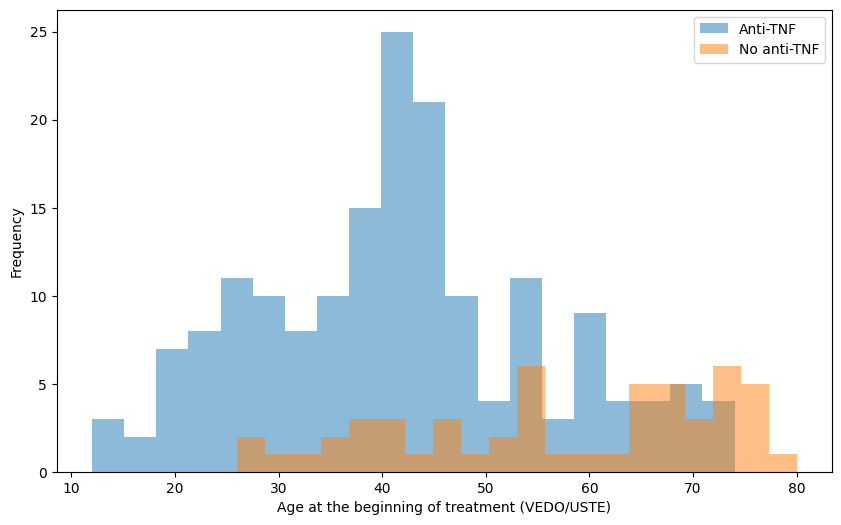

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

age_no_antitnf = subset_features[subset_features['anti_tnf_previo'] == 0]['edad_inicio_far']
age_antitnf = subset_features[subset_features['anti_tnf_previo'] == 1]['edad_inicio_far']

ax.hist(age_antitnf, bins=20, alpha=0.5, label='Anti-TNF')
ax.hist(age_no_antitnf, bins=20, alpha=0.5, label='No anti-TNF')

ax.set_xlabel('Age at the beginning of treatment (VEDO/USTE)')
ax.set_ylabel('Frequency')
ax.legend()

plt.show()